In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
m = 100

x1 = 50 + 30 * np.random.rand(m,1)
y = 135 + 0.5 * x1 + 3 * np.random.rand(m,1)

In [3]:
x1[:5]

array([[62.51066014],
       [71.6097348 ],
       [50.00343124],
       [59.06997718],
       [54.40267672]])

In [4]:
y[:5]

array([[167.23526478],
       [172.38604171],
       [162.65954192],
       [165.60679787],
       [164.92694382]])

# 散佈圖 (Scatter)

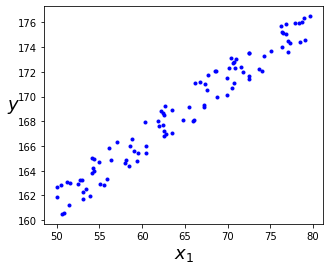

In [6]:
plt.figure(figsize=(5,4))

plt.plot(x1, y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.savefig("plot_ex1.pdf", dpi=300, bbox_inches='tight')

plt.show()

#  使用sklearn : LinearRegression()

## Fit (試配模型)

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x1, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([136.62700223]), array([[0.49732897]]))

## Predict

In [13]:
x1_new = np.array([[50], [80]])
                   
lin_reg.predict(x1_new)

array([[161.49345093],
       [176.41332015]])

## Plot the regression model

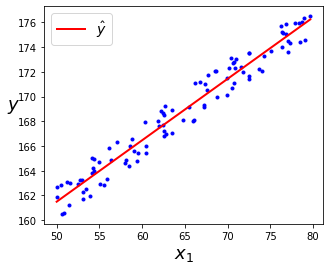

In [22]:
plt.figure(figsize=(5,4))

x1s = np.linspace(x1.min(),x1.max(),10).reshape(-1,1)
y_pred = lin_reg.predict(x1s)

plt.plot(x1, y, "b.")
plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# 使用矩陣計算 Nornal Equation

## Fit

In [16]:
X = np.c_[np.ones((x1.shape[0], 1)), x1]
X[:5]

array([[ 1.        , 62.51066014],
       [ 1.        , 71.6097348 ],
       [ 1.        , 50.00343124],
       [ 1.        , 59.06997718],
       [ 1.        , 54.40267672]])

In [17]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[136.62700223],
       [  0.49732897]])

## Predict

In [18]:
x1_new = np.array([[50], [80]])
X_new = np.c_[np.ones((2, 1)), x1_new]

y_pred =X_new.dot(theta)
y_pred

array([[161.49345093],
       [176.41332015]])